In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%pwd

'C:\\Users\\alejo\\UCEMA\\poo_teorica\\poo_ejercicios\\tp_final'

Link al dataset: `navegacion_web.pq`  [link](https://www.dropbox.com/s/u39wjhai7fnnxnq/navegacion_web.pq?dl=0)

**Apertura del dataset**

Usamos read parquet para la lectura del archivo

In [2]:
df= pd.read_parquet('data/navegacion_web.pq', engine='pyarrow')
data = df.copy()

In [3]:
data.head()

,user_id,device_id,session_id,device_model,min_session_time,total_previous_sessions,total_previous_events,date_short,total_previous_vipphoto_selected,total_previous_vip360view_selected,...,region,time_on_screen_prev,min_total_sessions_prev,all_total_sessions_prev,total_sessions_prev,stock_id,date,user_with_reserve,reserved,avg_time_previous_sessions
51760,9015447,yWOTGT6B-WzQU514Cqx1gL,1644253316189,Android,2022-02-07 17:01:56.223,1,1,2022-01-01 00:11:51.858,0,0,...,Mexico City,0.0,0,0,1,NaN,NaT,0.0,0.0,0.0
14885,8820027,LP42_fstvBPogWjh_1bkCg,1642913715699,Android,2022-01-23 04:55:17.124,1,9,2022-01-01 00:17:23.169,0,0,...,Mexico City,286.0,1,1,2,NaN,NaT,0.0,0.0,143.0
3992,5510567,AKERRpRODjl02b39AjfNb8,1642459615372,Android,2022-01-17 22:46:55.395,1,1,2022-01-01 00:22:28.720,0,0,...,Mexico City,0.0,0,0,1,NaN,NaT,0.0,0.0,0.0
131349,8665203,SxeKxvgE3mkec-e21Ej-bm,1647229337062,Android,2022-03-14 03:42:17.095,1,9,2022-01-01 00:27:00.994,0,0,...,Mexico City,379.0,1,1,2,NaN,NaT,0.0,0.0,189.5
25970,8409083,CttzrxBwYiDT93zwK93Xmt,1643398529809,Android,2022-01-28 19:35:32.308,1,1,2022-01-01 00:28:48.352,0,0,...,México,0.0,0,0,1,NaN,NaT,0.0,0.0,0.0


In [4]:
print(f'Filas: {data.shape[0]}')
print(f'Columnas: {data.shape[1]}')

Filas: 214160
Columnas: 32


In [5]:
data.dtypes

user_id                                           int64
device_id                                        object
session_id                                       object
device_model                                   category
min_session_time                         datetime64[ns]
total_previous_sessions                           int64
total_previous_events                             int64
date_short                               datetime64[ns]
total_previous_vipphoto_selected                  int64
total_previous_vip360view_selected                int64
total_previous_catalogfilter_selected             int64
total_previous_vip_viewed                         int64
total_previous_cataloglist_viewed                 int64
total_previous_home_viewed                        int64
total_previous_year_selected                      int64
total_previous_make_selected                      int64
total_previous_model_selected                     int64
total_previous_version_selected                 

# Analisis columnas
- **user_id**: id de usuario
- **device_id**: id del dispositivo
- **session_id**: id de la sesión, la sesión se activa con la entrada al sitio web
- **device_model**: modelo del dispositivo con el que se accedio al sitio
- **min_session_time**: Comienzo de la sesion ASUMO ESTA FECHA COMO LA DEFINITIVA
- **total_previous_sessions**: Total de sesiones previas (ELIMINAR)
- **total_previous_events**: Total de eventos (es un suceso dentro del sitio -reproduccion de un video, vista de un pd, agregar un pd al carrito-) previos
- **date_short**: NO SE QUE ES BORRAR
- **total_previous_vipphoto_selected**: Cantidad total de veces que se seleccionó foto en la sesion
- **total_previous_vip360view_selected**: Cantidad total de veces que se seleccionó vista 360 en la sesion
- **total_previous_catalogfilter_selected**: Cantidad total de veces que se seleccionó el filtro de catalogo en la sesion
- **total_previous_vip_viewed**: Cantidad total de veces que se vio el vip en la sesion
- **total_previous_cataloglist_viewed**: Cantidad total de veces que se vio la lista del catalogo en la sesion
- **total_previous_home_viewed**: Cantidad total de veces que se vio la home page en la sesion
- **total_previous_year_selected**: Cantidad total de veces que se seleccionó año del vehiculo en la sesion
- **total_previous_make_selected**: Cantidad total de veces que se seleccionó marca del vehiculo en la sesion
- **total_previous_model_selected**: Cantidad total de veces que se seleccionó modelo del vehiculo en la sesion
- **total_previous_version_selected**:Cantidad total de veces que se seleccionó version del vehiculo en la sesion
- **total_previous_mileage_selected**: Cantidad total de veces que se seleccionó kilometraje del vehiculo en la sesion
- **total_previous_location_selected**: Cantidad total de veces que se seleccionó ubicación en la sesion
- **total_previous_color_selected**: Cantidad total de veces que se seleccionó color del vehiculo en la sesion
- **city**: Ciudad (a veces la misma que la region)
- **region**: Region (Todo en Mexico)
- **time_on_screen_prev**: tiempo en pantalla acumulado, es la multiplicacion entre total_sessions_prev y avg_time_previous_session
- **min_total_sessions_prev**: es igual a all_total_sessions_prev == ELIMINAR
- **all_total_sessions_prev**: total de sesiones previas, es el calculo de count rows por device id en SQL (PREGUNTAR POR EL CALCULO EN SQL) (ELIMINAR)
- **total_sessions_prev**: sesiones previas del usuario (ASUMO ESTA COMO LA DEFINITIVA)
- **stock_id**: No vamos a utilizar esta columna, tiene 90% nulos
- **date**: mismos nulos que en stock_id, eliminar
- **user_with_reserve**: es igual a reserved, eliminar
- **reserved**: representa si el usuario realizo una reserva de auto en esa sesion, esta columna marca la conversion
- **avg_time_previous_session**: time on screen / total sessions prev



In [6]:
for column in data.columns:
    print('\n-- -- -- --')
    print(f'Nombre del campo: {column}')
    print(data[column].value_counts())


-- -- -- --
Nombre del campo: user_id
4362580    84
8343164    70
8334191    59
3198949    53
5686051    49
           ..
8280929     1
8812419     1
3874824     1
9702725     1
9742739     1
Name: user_id, Length: 140084, dtype: int64

-- -- -- --
Nombre del campo: device_id
Cpz7UTcnHU_D4rTaMnIOEH                  57
1D2yp4MoblAEwcKiMAqLEa                  56
qxSKQx6q3bGI8KOpdaH7AY                  49
H9DP1koF2KAZ-fttJ3HMIE                  46
USF9uZYH3EVFK9EnC8pvFh                  43
                                        ..
zVrmeY-KkDjVriGTvmIwJw                   1
ERfaDfwkke7VTRWFNp4LMn                   1
K4cIpqBFgnR1VLXz4oXHaD                   1
bsvVQM9GcKEGop47LY9jYK                   1
1aad33ac-8e00-4f1a-abf7-5ec15d537706     1
Name: device_id, Length: 156143, dtype: int64

-- -- -- --
Nombre del campo: session_id
1644253316189    1
1647959625633    1
1647227653641    1
1647401761936    1
1647403777638    1
                ..
1644448892154    1
1644447995289    1
164443831

In [7]:
data.columns


Index(['user_id', 'device_id', 'session_id', 'device_model',
       'min_session_time', 'total_previous_sessions', 'total_previous_events',
       'date_short', 'total_previous_vipphoto_selected',
       'total_previous_vip360view_selected',
       'total_previous_catalogfilter_selected', 'total_previous_vip_viewed',
       'total_previous_cataloglist_viewed', 'total_previous_home_viewed',
       'total_previous_year_selected', 'total_previous_make_selected',
       'total_previous_model_selected', 'total_previous_version_selected',
       'total_previous_mileage_selected', 'total_previous_location_selected',
       'total_previous_color_selected', 'city', 'region',
       'time_on_screen_prev', 'min_total_sessions_prev',
       'all_total_sessions_prev', 'total_sessions_prev', 'stock_id', 'date',
       'user_with_reserve', 'reserved', 'avg_time_previous_sessions'],
      dtype='object')

In [8]:
data[['min_session_time', 'total_previous_sessions', 'total_previous_events',
       'date_short', 'total_previous_vipphoto_selected',
       'total_previous_vip360view_selected',
       'total_previous_catalogfilter_selected', 'total_previous_vip_viewed',
       'total_previous_cataloglist_viewed', 'total_previous_home_viewed',
       'total_previous_year_selected', 'total_previous_make_selected',
       'total_previous_model_selected', 'total_previous_version_selected',
       'total_previous_mileage_selected', 'total_previous_location_selected',
       'total_previous_color_selected', 'city', 'region',
       'time_on_screen_prev', 'min_total_sessions_prev',
       'all_total_sessions_prev', 'total_sessions_prev']].describe()

,total_previous_sessions,total_previous_events,total_previous_vipphoto_selected,total_previous_vip360view_selected,total_previous_catalogfilter_selected,total_previous_vip_viewed,total_previous_cataloglist_viewed,total_previous_home_viewed,total_previous_year_selected,total_previous_make_selected,total_previous_model_selected,total_previous_version_selected,total_previous_mileage_selected,total_previous_location_selected,total_previous_color_selected,time_on_screen_prev,min_total_sessions_prev,all_total_sessions_prev,total_sessions_prev
count,214160.000000,214160.00000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,2.141600e+05,214160.000000,214160.000000,214160.000000
mean,6.721839,136.05466,5.022619,0.549743,28.677615,25.250299,35.365283,4.779613,0.372913,0.376718,0.339470,0.324351,0.299220,0.262229,0.247086,8.518372e+04,5.914989,5.914989,6.660035
std,15.737519,406.15579,49.460406,5.033431,122.384672,81.485442,177.395937,22.261192,1.913053,1.884517,1.705465,1.657433,1.599664,1.538530,1.416469,6.172415e+05,15.261105,15.261105,14.556284
min,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,1.000000,12.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.920000e+02,1.000000,1.000000,2.000000
50%,3.000000,36.00000,0.000000,0.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.140000e+02,2.000000,2.000000,3.000000
75%,6.000000,115.00000,0.000000,0.000000,18.000000,20.000000,14.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.426000e+03,5.000000,5.000000,6.000000
max,1388.000000,39953.00000,8286.000000,694.000000,11739.000000,6743.000000,21358.000000,2546.000000,320.000000,226.000000,223.000000,223.000000,211.000000,207.000000,213.000000,1.837662e+07,1410.000000,1410.000000,1361.000000


Muchas columnas tienen 0s hasta el 3 cuartil y luego maximos muy altos.
Todas las columnas _previous_, que muestran las acciones realizadas en la sesion, tienen maximos demasiado altos.
Sesiones previas tienen 3 cuartil de 5 o 6 sesiones y maximos de 1400, revisar outliers.


# Análisis por columna

In [9]:
%load_ext autoreload
%autoreload 2

#### Correlacion entre columnas

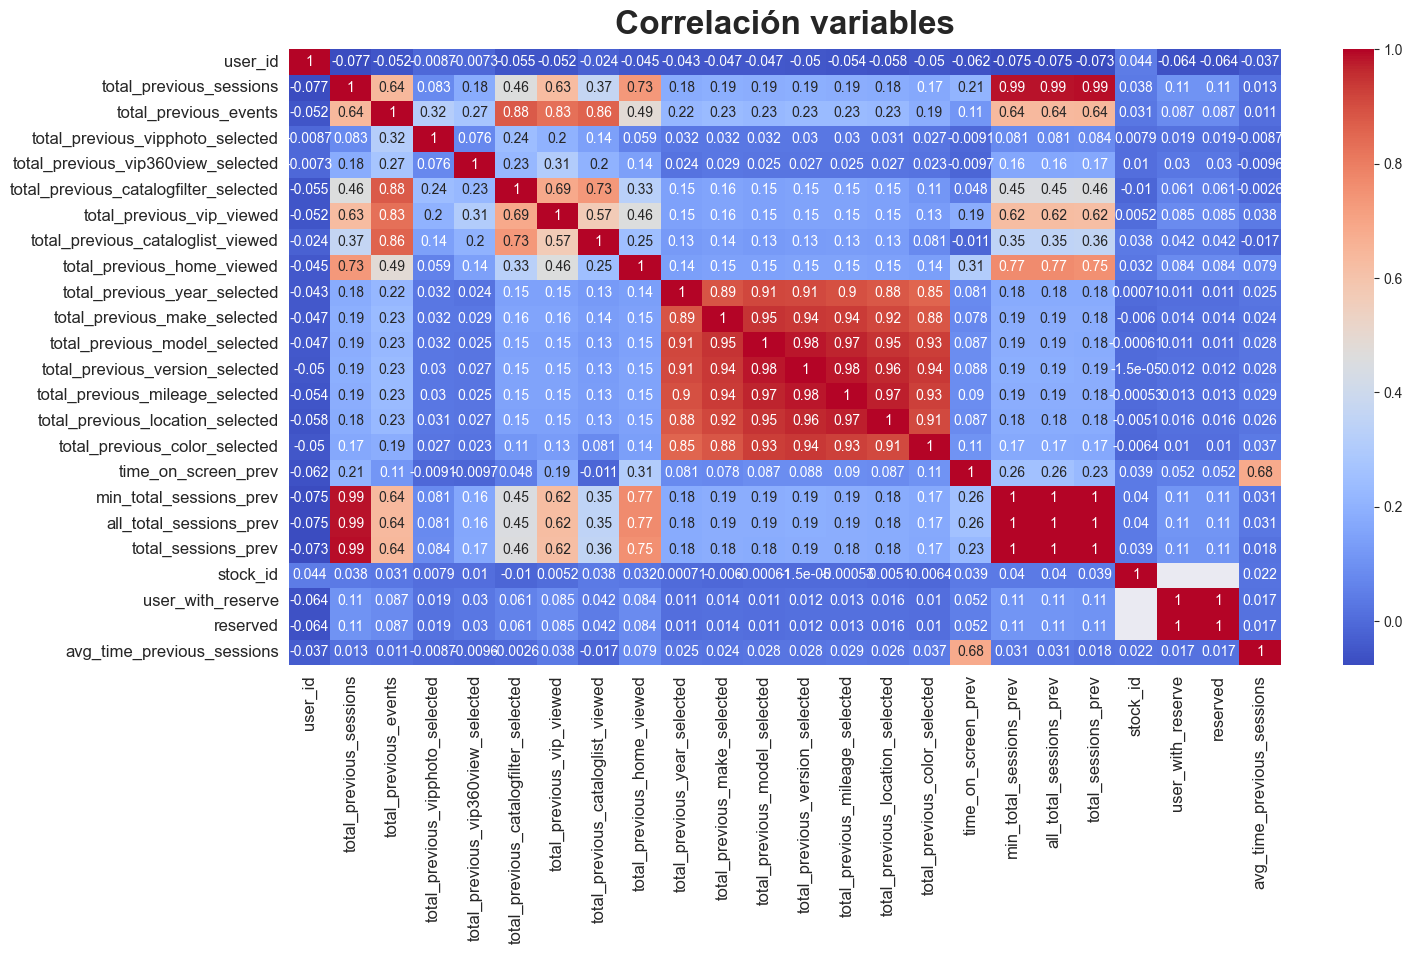

In [10]:
plt.figure(figsize=(16, 8))
sns.heatmap(data.corr(),annot=True, cmap="coolwarm").set_title('Correlación variables', fontdict = {'fontsize': 24,'verticalalignment': 'bottom'}, weight='bold')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show();


#### Users and Sessions

In [11]:
# No hay un usuario por cada fila
data.user_id.nunique() == len(data)

False

In [12]:
# Hay una sesion por fila
data.session_id.nunique() == len(data)

True

In [13]:
# agrupo sesiones por usuario
count_by_user = data.groupby('user_id').agg('count')['session_id'].to_frame('count_session_id')
count_by_user.sort_values(['count_session_id'],ascending=False)

,count_session_id
user_id,
4362580,84
8343164,70
8334191,59
3198949,53
5686051,49
...,...
8497762,1
8497717,1
8497691,1


In [14]:
# las sesiones se van guardando por usuario? Si veo un usuario a lo largo del tiempo, las sesiones deberian ir subiendo?
data[data.user_id == 9162486][['user_id','total_previous_sessions', 'total_previous_events','date_short','date','min_session_time','time_on_screen_prev', 'min_total_sessions_prev','all_total_sessions_prev', 'total_sessions_prev','avg_time_previous_sessions' ]].sort_values(['date_short'],ascending=True)

,user_id,total_previous_sessions,total_previous_events,date_short,date,min_session_time,time_on_screen_prev,min_total_sessions_prev,all_total_sessions_prev,total_sessions_prev,avg_time_previous_sessions
84471,9162486,1,10,2022-02-19 01:25:24.119,NaT,2022-02-19 02:38:54.625,252.0,1,1,2,126.000000
85522,9162486,4,137,2022-02-19 09:28:48.131,NaT,2022-02-19 16:56:13.562,2892.0,4,4,5,578.400000
85700,9162486,6,203,2022-02-19 17:24:16.131,NaT,2022-02-19 18:14:14.854,4583.0,6,6,7,654.714286
88606,9162486,10,203,2022-02-20 18:28:33.755,NaT,2022-02-20 21:01:23.996,2381.0,5,5,6,396.833333
88636,9162486,11,217,2022-02-20 21:04:54.520,NaT,2022-02-20 21:12:00.794,2592.0,6,6,7,370.285714
89371,9162486,13,339,2022-02-21 02:04:39.745,NaT,2022-02-21 02:08:23.163,5205.0,8,8,9,578.333333
89581,9162486,14,375,2022-02-21 02:54:39.309,NaT,2022-02-21 03:25:31.259,7981.0,9,9,10,798.100000
89620,9162486,15,410,2022-02-21 03:40:04.260,NaT,2022-02-21 03:40:10.592,8854.0,10,10,11,804.909091
90592,9162486,18,508,2022-02-21 15:11:29.372,NaT,2022-02-21 17:01:22.747,10429.0,12,12,13,802.230769
91167,9162486,20,525,2022-02-21 18:12:44.450,NaT,2022-02-21 21:22:03.483,10503.0,14,14,15,700.200000


#### Previous Sessions

In [15]:
# Comparo las 4 columnas que muestran sesiones previas, finalmente me quedo con total_previous_sessions
(data.min_total_sessions_prev == data.all_total_sessions_prev).value_counts()

True    214160
dtype: int64

In [16]:
(data.all_total_sessions_prev == data.total_sessions_prev).value_counts()


False    199191
True      14969
dtype: int64

In [17]:
(data.all_total_sessions_prev == data.total_previous_sessions).value_counts()


True     109242
False    104918
dtype: int64

In [18]:
((data.all_total_sessions_prev + data.total_previous_sessions) == data.total_sessions_prev).value_counts()

False    149652
True      64508
dtype: int64

Vamos a utilizar la columna total_sessions_prev para medir las sesiones previas

In [19]:
previous_sessions_describe = data.total_sessions_prev.describe()
previous_sessions_describe

count    214160.000000
mean          6.660035
std          14.556284
min           1.000000
25%           2.000000
50%           3.000000
75%           6.000000
max        1361.000000
Name: total_sessions_prev, dtype: float64

In [20]:
# convierto a nulo los outliers (superiores a 2 * tercer cuartil)
data['total_sessions_prev'] = data['total_sessions_prev'].apply(lambda x: np.nan if x> previous_sessions_describe.loc['75%'] * 2 else x)


In [21]:
# ahora imputamos los nulos que agregamos
from sklearn.impute import SimpleImputer

sessions_imp = SimpleImputer(strategy="most_frequent")
sessions_imp.fit(data[['total_sessions_prev']])
data[['total_sessions_prev']] = sessions_imp.transform(data[['total_sessions_prev']])

In [22]:
data.total_sessions_prev.describe()

count    214160.000000
mean          3.569761
std           2.440271
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          12.000000
Name: total_sessions_prev, dtype: float64

<AxesSubplot:ylabel='Frequency'>

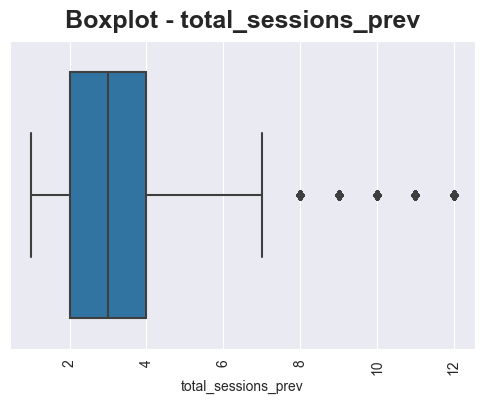

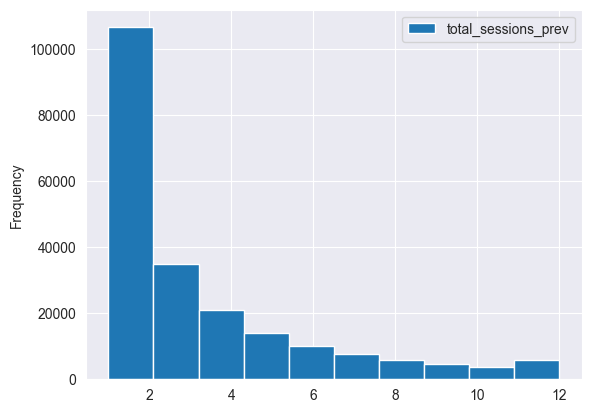

In [23]:
# vemos que hay una gran cantidad de outliers, hay que definir un criterio para quitarlos y estandarizar
from visualization import boxplot

boxplot(data,'total_sessions_prev')
data[['total_sessions_prev']].plot.hist(bins=10)

In [24]:
# aplicamos robust scaler para tratar los outliers
from sklearn.preprocessing import RobustScaler

escalador = RobustScaler()

data[['total_sessions_prev']] = escalador.fit_transform(data[['total_sessions_prev']])

In [25]:
data[['total_sessions_prev']].describe()

,total_sessions_prev
count,214160.000000
mean,0.284880
std,1.220135
min,-1.000000
25%,-0.500000
50%,0.000000
75%,0.500000
max,4.500000


#### Date columns

In [26]:
data[data.user_id == 4362580][['user_id','min_session_time','date_short','time_on_screen_prev']].sort_values(['date_short'],ascending=True)


,user_id,min_session_time,date_short,time_on_screen_prev
6888,4362580,2022-01-19 18:05:50.967,2022-01-19 06:34:43.900,6344.0
7083,4362580,2022-01-19 19:23:29.396,2022-01-19 18:51:27.260,185.0
7608,4362580,2022-01-19 23:07:02.437,2022-01-19 19:29:16.334,532.0
7591,4362580,2022-01-19 23:02:46.657,2022-01-19 21:40:44.149,7708.0
10037,4362580,2022-01-21 00:44:20.259,2022-01-19 23:08:58.022,648.0
...,...,...,...,...
137186,4362580,2022-03-17 02:05:33.596,2022-03-14 06:31:36.484,252.0
165341,4362580,2022-04-01 07:17:14.402,2022-03-21 00:10:49.335,3491.0
156140,4362580,2022-03-27 16:52:22.203,2022-03-25 06:38:27.349,24.0
171960,4362580,2022-04-05 18:37:49.910,2022-04-05 17:33:45.246,4231.0


min_session_time es la fecha de inicio de la sesion, vamos a quedarnos solo con esa columna

In [27]:
# divido la columna de fecha para observar horas, dias, semanas y meses
data['session_hour_of_day'] = data.min_session_time.dt.hour
data['session_day_of_month'] = data.min_session_time.dt.day
data['session_month'] = data.min_session_time.dt.month

In [28]:
# esta funcion la saque de stack overflow: https://stackoverflow.com/questions/25249033/week-of-a-month-pandas
import pandas as pd
import math

data['session_week_of_month'] = pd.to_numeric(data.min_session_time.dt.day/7)
data['session_week_of_month'] = data['session_week_of_month'].apply(lambda x: math.ceil(x))
data['session_week_of_month']

51760     1
14885     4
3992      3
131349    2
25970     4
         ..
214144    5
214111    5
214150    5
214142    5
214156    5
Name: session_week_of_month, Length: 214160, dtype: int64

In [29]:
date_time_cols = ['session_hour_of_day','session_day_of_month','session_week_of_month','session_month']
data[date_time_cols].describe()

,session_hour_of_day,session_day_of_month,session_week_of_month,session_month
count,214160.000000,214160.000000,214160.000000,214160.000000
mean,12.417099,16.386230,2.795639,2.583293
std,7.918700,8.661248,1.242365,1.011563
min,0.000000,1.000000,1.000000,1.000000
25%,4.000000,9.000000,2.000000,2.000000
50%,15.000000,17.000000,3.000000,3.000000
75%,19.000000,24.000000,4.000000,3.000000
max,23.000000,31.000000,5.000000,4.000000


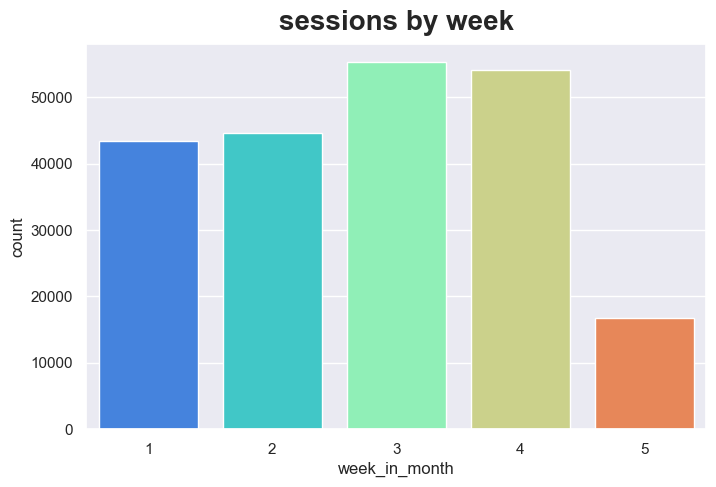

In [45]:
g = sns.countplot(data=data, x='session_week_of_month', palette="rainbow");
g.set_title('sessions by week', fontdict={'fontsize': 20, 'verticalalignment': 'bottom'}, weight='bold')
sns.set(rc={"figure.figsize": (8, 5)})

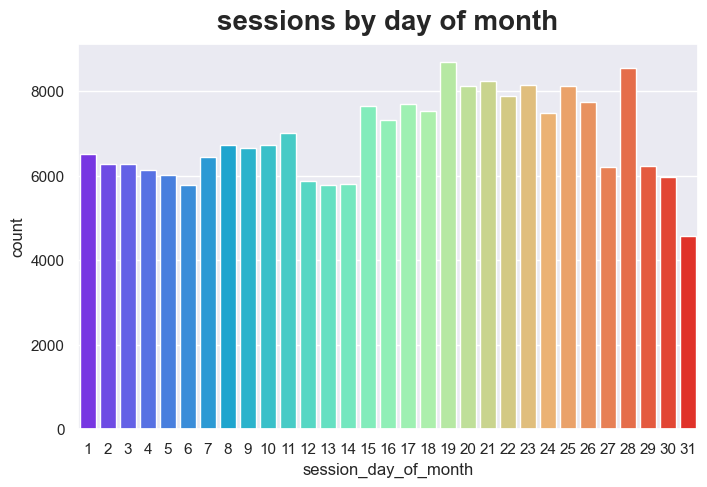

In [31]:
g = sns.countplot(data=data, x='session_day_of_month', palette="rainbow");
g.set_title('sessions by day of month', fontdict={'fontsize': 20, 'verticalalignment': 'bottom'}, weight='bold')
sns.set(rc={"figure.figsize": (8, 5)})

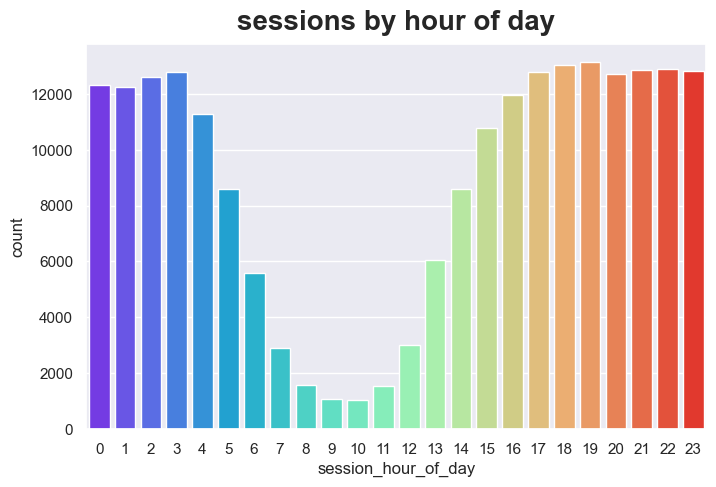

In [32]:
g = sns.countplot(data=data, x='session_hour_of_day', palette="rainbow");
g.set_title('sessions by hour of day', fontdict={'fontsize': 20, 'verticalalignment': 'bottom'}, weight='bold')
sns.set(rc={"figure.figsize": (8, 5)})

#### City and Region

In [ ]:
count_by_region = data.groupby('city').agg('count')['session_id'].to_frame('count_session_id')
count_by_region.sort_values(['count_session_id'],ascending=False)

In [ ]:
# gran concentracion de los registros en ciudad de mex
count_by_region = data.groupby('region').agg('count')['session_id'].to_frame('count_session_id')
count_by_region.sort_values(['count_session_id'],ascending=False)

In [ ]:
# reemplazo en region México por Mexico City, asumo que Mexico refiere a ciudad de mexico
data.region.replace('México', 'Mexico City', inplace=True)

In [ ]:
# reemplazo en region nan por None
data.region.replace('nan', 'None', inplace=True)

In [ ]:
count_by_region = data.groupby('region').agg('count')['session_id'].to_frame('count_session_id')
count_by_region.sort_values(['count_session_id'],ascending=False)

#### Devices

In [ ]:
# gran mayoria de usuarios que navegan usando dispositivos android
data.device_model.value_counts()

In [ ]:
data['device_model'] = data.device_model.apply(lambda x: 'iPhone' if 'iP' in x \
    else 'Motorola' if 'moto' in x \
    else 'Motorola' if 'Moto' in x \
    else 'SM' if 'SM' in x \
    else 'Redmi' if 'Redmi' in x \
    else x)
data.device_model.value_counts()

In [ ]:
less_repeated_devices = []
for val, cnt in data.device_model.value_counts().iteritems():
    if cnt < 1000:
        less_repeated_devices.append(val)

In [ ]:
data['device_model'] = data.device_model.apply(lambda x: 'Others' if x in less_repeated_devices \
    else x)
data.device_model.value_counts()

In [ ]:
from visualization import countplot
countplot(data,'device_model','Sesiones por dispositivo')

#### Events columns

In [ ]:
events_cols = ['total_previous_vipphoto_selected',
       'total_previous_vip360view_selected',
       'total_previous_catalogfilter_selected', 'total_previous_vip_viewed',
       'total_previous_cataloglist_viewed', 'total_previous_home_viewed',
       'total_previous_year_selected', 'total_previous_make_selected',
       'total_previous_model_selected', 'total_previous_version_selected',
       'total_previous_mileage_selected', 'total_previous_location_selected',
       'total_previous_color_selected']


In [ ]:
# todas tienen maximos muy altos, son outliers y tenemos que estandarizar
data[events_cols].describe()

In [ ]:
for i in events_cols:
    data[i] = data[i].apply(lambda x: np.nan if x > 30 else x)


In [ ]:
data[events_cols].isnull().sum()

In [ ]:
data[events_cols].describe()

In [ ]:
# remplazo los valores que transforme a nulos usando la mediana
from sklearn.impute import SimpleImputer

events_imp = SimpleImputer(strategy="median")
for i in events_cols:
    events_imp.fit(data[[i]])
    data[[i]] = events_imp.transform(data[[i]])


In [ ]:
data[events_cols].describe()


In [ ]:
for i in events_cols:
    boxplot(data,i)

In [ ]:
# aplicamos robust scaler para tratar los outliers
for i in events_cols:
    data[[i]] = escalador.fit_transform(data[[i]])

In [ ]:
data[events_cols].describe()

#### Time on screen

In [ ]:
screen_time_describe = data.time_on_screen_prev.describe()
screen_time_describe.round(2)

In [ ]:
# convierto a nulo los outliers (superiores a 2 * tercer cuartil)
data['time_on_screen_prev'] = data['time_on_screen_prev'].apply(lambda x: np.nan if x> screen_time_describe.loc['75%'] * 2 else x)

In [ ]:
# ahora imputamos los nulos que agregamos
from sklearn.impute import SimpleImputer

screen_time_imp = SimpleImputer(strategy="most_frequent")
screen_time_imp.fit(data[['time_on_screen_prev']])
data[['time_on_screen_prev']] = screen_time_imp.transform(data[['time_on_screen_prev']])

In [ ]:
# vemos que hay una gran cantidad de outliers, hay que definir un criterio para quitarlos y estandarizar
from visualization import boxplot

boxplot(data, 'time_on_screen_prev')
data[['time_on_screen_prev']].plot.hist(bins=10)


In [ ]:
# aplicamos robust scaler para tratar los outliers
from sklearn.preprocessing import RobustScaler

escalador = RobustScaler()

data[['time_on_screen_prev']] = escalador.fit_transform(data[['time_on_screen_prev']])

In [ ]:
data[['time_on_screen_prev']].describe()

#### Group_by conversion

In [ ]:
# vemos que la prorporcion de conversion es baja
print(f'El dataset tiene {data.reserved.value_counts(normalize=True).round(2)[0] *100}% de sesiones donde no se convirtio, mientras que solo {data.reserved.value_counts(normalize=True).round(2)[1]*100}% que si lo hicieron')

In [ ]:
data.user_id.nunique()

In [ ]:
# Hay 8863 usuarios que reservaron y 136921 que no lo hicieron
data.groupby('reserved')['user_id'].nunique()

#### Reserved

In [ ]:
mask_reserva = data.reserved == 1
group_device_reserved_user = data[mask_reserva].groupby('device_model').agg('count',)['user_id'].to_frame('cantidad de usuarios').sort_values('cantidad de usuarios', ascending=False)
group_device_reserved_user

In [ ]:
group_device_reserved_user.plot(kind='bar')

In [ ]:
from visualization import scatter
scatter(data[mask_reserva], 'total_previous_events', 'total_previous_sessions')

In [ ]:
data[mask_reserva].describe()

In [ ]:
# comparo eventos para reservados y no, vemos que muchos eventos son mayores cuando el usuario reserva
data.groupby('reserved').agg('mean')[events_cols]

#### Stock_id

In [ ]:
# vemos que hay menos stock id que reservas, es decir que se repiten los autos en diferentes reservas, hay que revisar esto porque no podriamos considerar conversion a la reserva
print(f'Filas con conversion: {len(data[mask_reserva])}')
print(f'Cantidad de stock_id (autos) unicos: {data[mask_reserva].stock_id.nunique()}')

In [ ]:
# existen usuarios que reservaron mas de una vez un stock id, y vemos que hay usuarios que reservaron mas de un auto
data[mask_reserva].groupby(['user_id', 'stock_id']).agg('count')['device_id'].to_frame('cantidad de conversion con mismo stock id')

# Duplicados

In [ ]:
cantidad_duplicados = len(data) - len(data.drop_duplicates())
cantidad_duplicados

# Tratamiento de nulos

In [ ]:
data.isnull().sum()

In [ ]:
for column in data.columns:
    if data[column].isnull().sum() >0:
        print(f'----------------')
        print(f'La columna {column}')
        print(f'Cantidad de nulos {data[column].isnull().sum()}')
        print(f'Cantidad de nulos {round(data[column].isnull().sum()/data.shape[0]*100,2)}%')

In [ ]:
# stock_id y date coinciden en todos sus nulos, ya que se relacionan con las reservas
# stock id es el id del auto reservado y date la fecha de reserva
# sus nulos no son erroneos
data[data.date.notnull() & data.stock_id.isnull()][['city','stock_id','date']]

In [ ]:
data[(data.date.notnull())][['date_short','date']]

In [ ]:
data.city.dtypes

In [ ]:
data.region.dtypes

In [ ]:
data = data.astype({'city':'string','region':'string'})
data[['city','region']].info()

In [ ]:
# encuentro nulos en stock y date con city, no parecen tener relacion
data[data.city.notnull() & data.date.isnull() & data.stock_id.isnull()][['city','stock_id','date']]

In [ ]:
# rellenar los nulos con region es una opcion para imputar
data[['city', 'region']]

In [ ]:
data.loc[data.city.isnull(),'city'] = data['region']
data.city.isnull().sum()

# Columnas quitadas
- `date_short` --> no conozco el significado de esta columna
- `min_total_sessions_prev` --> elegi otra columna para mostrar sesiones previas
- `all_total_sesssions_prev` --> elegi otra columna para mostrar sesiones previas
- `min_total_sessions_prev` --> elegi otra columna para mostrar sesiones previas
- `total_previous_sessions` --> elegi otra columna para mostrar sesiones previas
- `stock_id` --> id del auto reservado, no se utilizara en este modelo
- `date` --> fecha de reserva del auto, no coincide con la fecha de la sesion por lo que no tiene mucho sentido ya que cada fila es una sesion
- `user_with_reserve` --> es igual a la columna reserved
- `city` --> es similar a region, tiene nulos que no pude inputar

In [ ]:
# saco las columnas que no son utiles para el modelado
data.drop(columns=['date_short','min_total_sessions_prev','all_total_sessions_prev', 'total_previous_sessions','stock_id','date','user_with_reserve', 'city'], inplace=True)

# Modelos

In [ ]:
# dateshort es la fecha de la sesion, usamos esa para dividirla en dias de la semana, meses, y asi ver si hay alguna influencia de eso en la conversion
